### Configuration

In [1]:
# Relative import helper functions
from src.basic import *
from src.ml import *

# Standard packages import
import pandas as pd
from config import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import quandl as q
q.ApiConfig.api_key = API_KEY  # Set API key permanently

# Configure standardardised variables amongst all trading functions
data = q.get('WIKI/GOOGL', start_date = "2010-01-01", end_date = "2018-01-01")
data = data[['Close']]  # Standard configuration of data with one row index "Date" and one column "Close"
amount = 10000
tc = 0
col = 'Close'
lags = 3
data.head()


,Close
Date,
2010-01-04,626.75
2010-01-05,623.99
2010-01-06,608.26
2010-01-07,594.10
2010-01-08,602.02


### Trading Strategies Implementation

In [8]:
# Calculate out-performance of all trading strategies
SMA_operf = SimpleMovingAverage(42, 252, data.copy(), col, amount, tc)
Momentum_operf = Momentum(3, data.copy(), col, amount, tc)
MeanReversion_operf = MeanReversion(3, data.copy(), col, 3.5, amount, tc)
OLS_operf = OLS(data.copy(), 'Close', lags, amount, tc)
logreg_operf = logreg(data.copy(), 'Close', lags, amount, tc)
neural_network_operf = neural_network(data.copy(), 'Close', lags, amount, tc)

# Find the best outperforming strategy
results = {
    'SMA_operf': SMA_operf[2],
    'Momentum_operf': Momentum_operf[2],
    'MeanReversion_operf': MeanReversion_operf[2], 
    'OLS_operf': OLS_operf[2],
    'logreg_operf': logreg_operf[2],
    'neural_network_operf': neural_network_operf[2]
}

best_strategy = max(results, key=results.get)
best_results = results[best_strategy]
print('The best trading strategy is', best_strategy, 'with a out-performance of USD', round(best_results, 2))


51/51 [==============================] - 0s 1ms/step
The best trading strategy is logreg_operf with a out-performance of USD 14387.28


### Data Visualisation

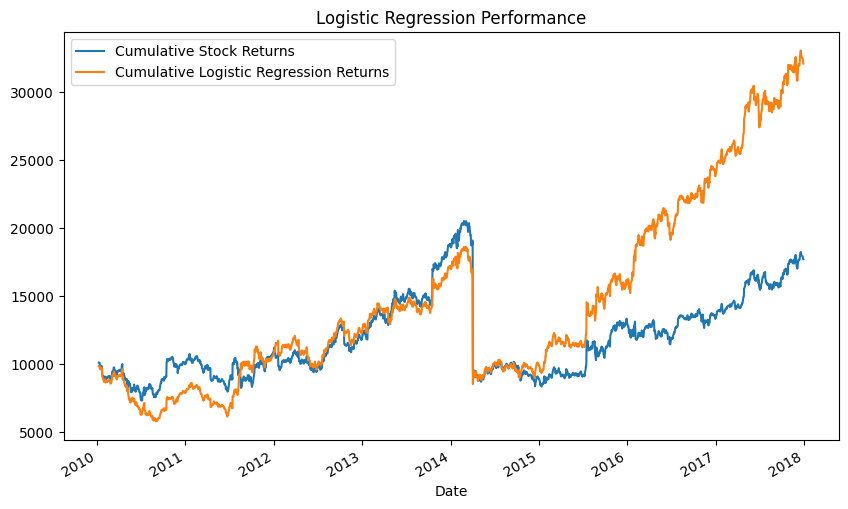

In [13]:
# Visualise Logistic Regression
title = 'Logistic Regression Performance'
logreg_operf[0][['creturns', 'cstrategy']].plot(figsize=(10,6),
                                                title = title,
                                                )
plt.legend(['Cumulative Stock Returns', 'Cumulative Logistic Regression Returns'])
